In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data preprocessing and logistic regression for a binary classification problem

In the task, you will be asked to familiarize yourself with the basic data preprocessing techniques, as well as apply them to train a logistic regression model. The answer will need to be uploaded to the appropriate form in the form of 6 text files.

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Dataset description

Given 38 features associated with a grant application (a researcher's field of study, information about their academic background, the size of the grant, and the field in which it is given), predict whether an application will be accepted. The dataset includes information on 6,000 grant applications that were submitted to the University of Melbourne between 2004 and 2008.

The full version of the data with more features can be found at https://www.kaggle.com/c/unimelb.

In [313]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

Select the target variable Grant.Status from the dataset and denote it by y.
Now X is the training sample, y - the answers to it.

In [314]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

In [239]:
X.head()

,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,0.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,0.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


## Logistic regression

After realizing what kind of problem needs to be solved on these data, the next step in real analysis would be the selection of an appropriate method. In this task, the choice of method was made for you, this is logistic regression. Let us briefly remind you of the model used.

Logistic regression predicts the probabilities of an object belonging to each class. The sum of logistic regression responses on one object for all classes is equal to one.

$$ \sum_{k=1}^K \pi_{ik} = 1, \quad \pi_k \equiv P\,(y_i = k \mid x_i, \theta), $$

где:
- $\pi_{ik}$ - probability of belonging to an object $x_i$ from $X$ to class $k$
- $\theta$ - internal parameters of the algorithm that are tuned during the learning process, in the case of logistic regression - $w, b$

From this property of the model in the case of binary classification, it is required to calculate only the probability of an object belonging to one of the classes (the second is calculated from the probability normalization condition). This probability is calculated using the logistic function:
$$ P\,(y_i = 1 \mid x_i, \theta) = \frac{1}{1 + \exp(-w^T x_i-b)} $$

Parameters $w$ and $b$ can be found, as a solution to the following optimization problem:

L2-regularization:

$$ Q(X, y, \theta) = \frac{1}{2} w^T w + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

L1-regularization:

$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

$C$ - this is a standard model hyperparameter that controls how much we allow the model to adjust to the data.

## Data preprocessing

From the properties of this model it follows that:
- all $X$ must be numeric data (if there are categories among them, they need to be converted to real numbers in some way)
- there should be no missing values among $X$ (i.e. all missing values should be filled somehow before applying the model)

Therefore, the basic step in the preprocessing of any dataset for logistic regression will be the coding of categorical features, as well as the removal or interpretation of missing values (if any).

In [240]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


It can be seen that the dataset contains both numerical and categorical features. Get a list of their names:

In [315]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

In [242]:
#Check for NaN under a single DataFrame column:
print(X['RFCD.Percentage.1'].isnull().values.any())
#Count the NaN under a single DataFrame column:
print(X['RFCD.Percentage.1'].isnull().sum())
#Check for NaN under an entire DataFrame:
print(X[categorical_cols].isnull().values.any())
#Count the NaN under an entire DataFrame:
print(X[categorical_cols].isnull().sum().sum())

#check if 1st element in 1st column is Nan:
print(X['RFCD.Percentage.1'][0])
print(pd.isna(X['RFCD.Percentage.1'][0]))

True
417
True
20980
50.0
False


In [243]:
X[numeric_cols].head()

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0


It also contains missing values. The obvious solution would be to exclude all data that has at least one value missing.

In [115]:
data.dropna().shape

(213, 39)

It can be seen that then we will discard almost all the data, and this solution method will not work in this case.

Missing values can be interpreted in the same way, there are several ways to do this, they differ for categorical and real features.

For real features:
- replace with 0 (this attribute will not contribute to the prediction for this object)
- replace with the average (each missing feature will make the same contribution as the average value of the feature on the dataset)

For categorical:
- interpret the missing value as another category (this method is the most natural, since in the case of categories we have a unique opportunity not to lose information about the presence of missing values; note that in the case of real features, this information is inevitably lost)

##  Task 0. Handling missing values.
1. Fill in the missing real values in X with zeros and column averages, name the resulting dataframes X_real_zeros and X_real_mean respectively. To calculate the averages, use the calculate_means function described below, which needs to pass real features from the original dataframe to the input. **You can use the pandas.mean() function to calculate the average**
2. Convert all categorical features in X to strings, missing values must also be converted to any strings that are not categories (for example, 'NA'), name the resulting dataframe X_cat.

To merge selections here and further in the task, it is recommended to use the functions

    np.hstack(...)
    np.vstack(...)

In [316]:
#replace with 0 all NaN in Numeric colums, new dataset contains only numeric columns with 0 instead of NaN:
X_real_zeros = pd.DataFrame(X[numeric_cols].fillna(0))

#verification:
#Check for NaN under an entire DataFrame:
print(X_real_zeros.isnull().values.any())
#Count the NaN under an entire DataFrame:
print(X_real_zeros.isnull().sum().sum())
X_real_zeros

False
0


,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,50.0,30.0,20.0,0.0,0.0,50.0,30.0,20.0,0.0,0.0,1970.0,2.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1975.0,0.0,0.0
5997,40.0,40.0,20.0,0.0,0.0,40.0,40.0,20.0,0.0,0.0,1955.0,3.0,3.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,0.0,0.0


In [317]:
#means in each column:
means = np.zeros(X[numeric_cols].shape[1])
for j in range(X[numeric_cols].shape[1]):
    means[j]=np.mean(X[numeric_cols].iloc[:,j])
print(means)
#new dataset contains only numeric columns with means instead of NaN:
X_real_mean=X[numeric_cols]
for j in range(X[numeric_cols].shape[1]):
       X_real_mean.iloc[:,j] = pd.DataFrame(X[numeric_cols].iloc[:,j].fillna(means[j]))
#to rename columns if needed:
#X_real_mean.rename(columns={0:'RFCD.Percentage.1', 1:'RFCD.Percentage.2', 2:'RFCD.Percentage.3', 
#                3:'RFCD.Percentage.4', 4:'RFCD.Percentage.5',
#                5:'SEO.Percentage.1', 6:'SEO.Percentage.2', 7:'SEO.Percentage.3',
#                8:'SEO.Percentage.4', 9:'SEO.Percentage.5',
#                10:'Year.of.Birth.1', 11:'Number.of.Successful.Grant.1', 12:'Number.of.Unsuccessful.Grant.1'})
X_real_mean


[7.48323482e+01 1.76775927e+01 6.93301093e+00 4.37936593e-01
 1.19111589e-01 7.14832404e+01 2.06468801e+01 6.92670383e+00
 7.30803812e-01 2.12192052e-01 1.96244985e+03 1.17784878e+00
 2.09797657e+00]


,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.000000,30.000000,20.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1965.0,2.0,0.0
1,100.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1965.0,3.0,1.0
2,50.000000,30.000000,20.000000,0.000000,0.000000,60.00000,20.00000,20.000000,0.000000,0.000000,1955.0,1.0,5.0
3,60.000000,40.000000,0.000000,0.000000,0.000000,60.00000,40.00000,0.000000,0.000000,0.000000,1950.0,2.0,1.0
4,100.000000,0.000000,0.000000,0.000000,0.000000,50.00000,50.00000,0.000000,0.000000,0.000000,1970.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,50.000000,30.000000,20.000000,0.000000,0.000000,50.00000,30.00000,20.000000,0.000000,0.000000,1970.0,2.0,0.0
5996,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1975.0,0.0,0.0
5997,40.000000,40.000000,20.000000,0.000000,0.000000,40.00000,40.00000,20.000000,0.000000,0.000000,1955.0,3.0,3.0
5998,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1950.0,0.0,0.0


In [318]:
#apply string type for categ.columns
X_cat=X[categorical_cols]
X_cat = X_cat.astype("string")
print(type(X_cat.iloc[0,0]))
#replace NaN with 'NA' 
X_cat = (X_cat.fillna('NA'))

#verify if there is any NaN left:
#Check for NaN under an entire DataFrame:
print(X_cat.isnull().values.any())
#Count the NaN under an entire DataFrame:
print(X_cat.isnull().sum().sum())

X_cat

<class 'str'>
False
0


,Faculty.No..1,RFCD.Code.5,Person.ID.1,Role.1,RFCD.Code.2,SEO.Code.4,Country.of.Birth.1,Grant.Category.Code,RFCD.Code.3,A.1,...,RFCD.Code.4,Sponsor.Code,SEO.Code.5,SEO.Code.2,SEO.Code.3,No..of.Years.in.Uni.at.Time.of.Grant.1,Dept.No..1,Contract.Value.Band...see.note.A,SEO.Code.1,Home.Language.1
0,31.0,0.0,493297.0,CHIEF_INVESTIGATOR,230203.0,0.0,Australia,50A,230204.0,4.0,...,0.0,21A,0.0,0.0,0.0,>=0 to 5,3098.0,A,780101.0,NA
1,25.0,0.0,330592.0,CHIEF_INVESTIGATOR,0.0,0.0,Australia,10A,0.0,2.0,...,0.0,4D,0.0,0.0,0.0,>=0 to 5,2553.0,D,730112.0,NA
2,25.0,0.0,66887.0,CHIEF_INVESTIGATOR,321004.0,0.0,Australia,NA,321015.0,7.0,...,0.0,NA,0.0,730105.0,730108.0,Less than 0,2813.0,NA,730203.0,NA
3,25.0,0.0,63812.0,CHIEF_INVESTIGATOR,321402.0,0.0,Great Britain,20C,0.0,6.0,...,0.0,51C,0.0,671401.0,0.0,more than 15,2553.0,A,730114.0,NA
4,25.0,0.0,13687.0,CHIEF_INVESTIGATOR,0.0,0.0,Australia,30B,0.0,0.0,...,0.0,24D,0.0,730306.0,0.0,Less than 0,2923.0,NA,730108.0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7.0,0.0,10402.0,CHIEF_INVESTIGATOR,440207.0,0.0,Australia,50A,379999.0,1.0,...,0.0,21A,0.0,750702.0,750401.0,>=0 to 5,653.0,NA,750902.0,NA
5996,NA,NA,102602.0,CHIEF_INVESTIGATOR,NA,NA,NA,10A,NA,1.0,...,NA,163C,NA,NA,NA,NA,NA,NA,NA,NA
5997,25.0,0.0,68587.0,CHIEF_INVESTIGATOR,321208.0,0.0,Australia,30C,321210.0,2.0,...,0.0,112D,0.0,730211.0,730204.0,>10 to 15,2523.0,A,730201.0,NA
5998,118.0,NA,16757.0,CHIEF_INVESTIGATOR,NA,NA,Australia,NA,NA,0.0,...,NA,NA,NA,NA,NA,Less than 0,1798.0,A,NA,NA


## Transformation of categorical features.

In the previous cell, we divided our dataset into two more parts: in one there are only real features, in the other only categorical ones. We will need this for separate subsequent processing of these data, as well as for comparing the quality of work of various methods.

To use the regression model, it is required to convert categorical features into real features. Let's consider the main way of converting categorical features into real ones: one-hot encoding. His idea is that we transform a categorical feature using a binary code: each category is assigned a set of zeros and ones.

Let's see how this method works on a simple data set.

In [120]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Закодированные данные:

[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


As you can see, information about the country was encoded in the first three columns, and information about the gender was encoded in the second two. In this case, for matching elements of the selection, the lines will completely match. It can also be seen from the example that feature coding greatly increases their number, but completely preserves information, including the presence of missing values (their presence simply becomes one of the binary features in the transformed data).

Now apply one-hot encoding to the categorical features from the original dataset. Pay attention to the common interface for all methods of data processing. Function

    encoder.fit_transform(X)
    
allows you to calculate the necessary transformation parameters, later you can already apply the function to new data

    encoder.transform(X)
    
It is very important to apply the same transformation to both the training and test data, because otherwise you will get unpredictable, and most likely bad results. In particular, if you encode the training and test sets separately, you will generally get different codes for the same features, and your solution will not work.

Also, the parameters of many transformations (for example, the scaling discussed below) cannot be calculated simultaneously on training and test data, because otherwise the quality metrics calculated on the test will give biased estimates of the quality of the algorithm. The coding of categorical features does not consider any parameters on the training sample, so it can be applied immediately to the entire dataset.

In [319]:
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())
X_cat_oh=pd.DataFrame(X_cat_oh)
X_cat_oh


,0,1,2,3,4,5,6,7,8,9,...,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


To build a quality metric based on the learning outcome, it is required to divide the original dataset into training and test sets.

Pay attention to the given parameter for the random number generator: random_state. Since the results on training and test will depend on how exactly you separate the objects, it is suggested to use a predetermined value to obtain results consistent with the answers in the task checking system.

In [257]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

In [258]:
X_train_real_zeros

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
4831,30.0,30.0,40.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1960.0,0.0,0.0
4646,40.0,30.0,30.0,0.0,0.0,40.0,60.0,0.0,0.0,0.0,1970.0,0.0,0.0
2154,30.0,40.0,30.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1980.0,0.0,1.0
1581,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,30.0,35.0,35.0,0.0,0.0,35.0,35.0,30.0,0.0,0.0,1965.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,100.0,0.0,0.0,0.0,0.0,90.0,10.0,0.0,0.0,0.0,1940.0,2.0,4.0
3264,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1955.0,0.0,0.0
1653,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,1.0,3.0
2607,40.0,60.0,0.0,0.0,0.0,80.0,20.0,0.0,0.0,0.0,1960.0,8.0,4.0


In [259]:
X_train_cat_oh

,0,1,2,3,4,5,6,7,8,9,...,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592
4831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Description of classes

So, we have received the first data sets for which both restrictions of the logistic regression on the input data are satisfied. We will train regression on them using the functionality available in the sklearn library for selecting model hyperparameters
    
    optimizer = GridSearchCV(estimator, param_grid)


This class performs cross-validation of the training set for each set of parameters and finds those on which the algorithm performs best. This method allows you to tune hyperparameters on the training set, avoiding overfitting. Some optional call parameters for this class that we will need:
- scoring - quality functional, the maximum of which is searched for by cross-validation, by default the score() function of the esimator class is used
- n_jobs - allows you to speed up cross-validation by executing it in parallel, the number determines the number of simultaneously running tasks
- cv - the number of folds into which the sample is divided during cross-validation

After initialization of the GridSearchCV class, the selection process is started by the following method:

    optimizer.fit(X, y)
    
At the output, to obtain predictions, you can use the function:

    optimizer.predict(X)
    
or

    optimizer.predict_proba(X)
    
for probabilities (in case of using logistic regression).
    
You can also directly get the optimal estimator class and optimal parameters, since they are attributes of the GridSearchCV class:
- best\_estimator\_ - best algorithm
- best\_params\_ - the best set of parameters

The logistic regression class looks like this:

     estimator = LogisticRegression(penalty)
   
where penalty is either 'l2' or 'l1'. The default value is 'l2', and everywhere in the task, unless otherwise noted, the use of logistic regression with L2 regularization is assumed.

## Task 1. Comparison of ways to fill in real missing values.
1. Make two training samples from real and categorical features: in one, real features, where the missing values are filled with zeros, in the other, with averages. It is recommended to record real, and then categorical features in the samples first.
2. Train logistic regression on them by selecting parameters from the given param_grid grid using the cross-validation method with the number of folds cv=3. **When learning, use the solver='liblinear' parameter in this and subsequent notebook tasks.**
3. Plot two graphs of the +- accuracy scores of their standard deviation vs. hyperparameter and make sure you actually find its maximum. Also pay attention to the large variance of the resulting estimates (it can be reduced by increasing the number of cv folds).
4. Obtain two AUC ROC quality metrics on the test set and compare them with each other. Which way to fill in missing real values works better? In the future, to complete the task, use the sample that gives the best quality on the test as real features.
5. Pass two AUC ROC values (first for the sample filled with means, then for the sample filled with zeros) to the write_answer_1 function and run it. The resulting file is the answer to 1 task.

Generally speaking, it is not quite logical to optimize the default accuracy functional in the logistic regression class for cross-validation, but measure it on the AUC ROC test, but this, like the sample size limitation, was done to speed up the cross-validation process.

In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores=[]
    for i in range(len(optimizer.cv_results_['params'])):
        scores.append([optimizer.cv_results_['params'][i]['C'], 
                optimizer.cv_results_['mean_test_score'][i],
                optimizer.cv_results_['std_test_score'][i]])
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(auc))
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3


train_1 = X_train_real_zeros.join(X_train_cat_oh)
train_2 = X_train_real_mean.join(X_train_cat_oh)
test_1 = X_test_real_zeros.join(X_test_cat_oh)
test_2 = X_test_real_mean.join(X_test_cat_oh)

estimator = LogisticRegression(penalty='l2', solver='liblinear')
optimizer_1 = GridSearchCV(estimator, param_grid, cv=3)
optimizer_1.fit(train_1, y_train)
#plot_scores(optimizer_1)
best_C=optimizer_1.best_params_

from sklearn import metrics 

predictions_1 = optimizer_1.predict_proba(test_1)[:,1]
print(predictions_1)
AUC_ROC_1 = metrics.roc_auc_score(y_test, predictions_1)

print(AUC_ROC_1)

[0.66188479 0.4235586  0.09457682 ... 0.07162265 0.09794917 0.11100718]
0.8845914934214028


In [269]:

estimator = LogisticRegression(penalty='l2', solver='liblinear')
optimizer_2 = GridSearchCV(estimator, param_grid, cv=3)
optimizer_2.fit(train_2, y_train)
#plot_scores(optimizer_2)


predictions_2 = optimizer_2.predict_proba(test_2)[:,1]

AUC_ROC_2 = metrics.roc_auc_score(y_test, predictions_2)
print(AUC_ROC_1, AUC_ROC_2)

0.8845914934214028 0.8853945611649308


In [270]:
write_answer_1(AUC_ROC_2, AUC_ROC_1)

## Scaling of real features.

Let's try to somehow improve the quality of classification. To do this, let's look at the data itself:

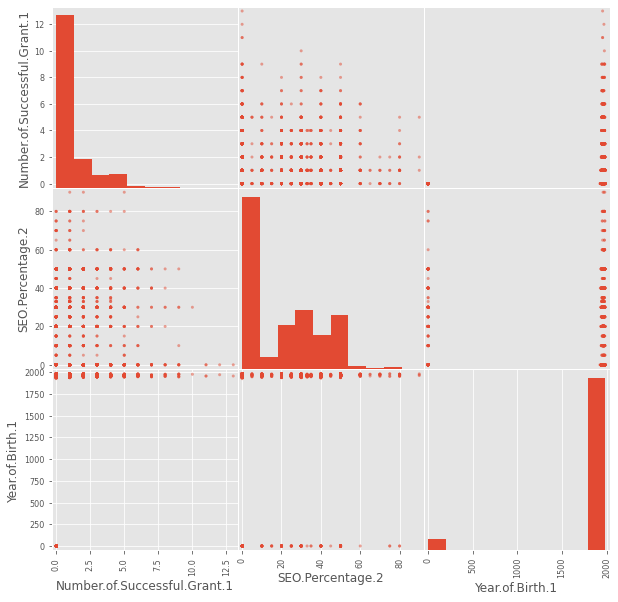

In [271]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

As can be seen from the graphs, different features are very different from each other modulo values (pay attention to the ranges of values of the x and y axes). In the case of conventional regression, this does not affect the quality of the trained model in any way, since features that are smaller in modulus will have large weights, but when using regularization, which penalizes the model for large weights, regression, as a rule, starts to work worse.

In such cases, it is always recommended to standardize (scaling) the features so that they differ less from each other in modulus, but at the same time, no other properties of the feature space are violated. Moreover, even if the final quality of the model on the test decreases, this increases its interpretability, because the new weights make sense of the "significance" of this feature for the final classification.

Standardization is carried out by subtracting the mean value from each feature and normalizing to the sample standard deviation:

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

## Task 1.5. Scaling of real features.

1. Similar to calling one-hot encoder, apply real feature scaling for training and test sets X_train_real_zeros and X_test_real_zeros using the class

         StandardScaler
   
    and methods

         StandardScaler.fit_transform(...)
         StandardScaler.transform(...)
2. Save the answer to the variables X_train_real_scaled and X_test_real_scaled respectively

In [272]:
from sklearn.preprocessing import StandardScaler

# place your code here

scaler = StandardScaler()
scaler.fit(X_train_real_zeros, y_train)
X_train_real_scaled = scaler.transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)
#X_real_scaled = scaler.transform(X_real_zeros)

#(X_train_real_scaled, 
#X_test_real_scaled) = train_test_split(X_real_scaled,
                           #          test_size=0.3, 
                           #          random_state=0)

pd.DataFrame(X_train_real_scaled)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.237907,0.713793,2.930921,-0.132421,-0.05932,-0.498697,1.523473,-0.556283,-0.183075,-0.094005,0.248726,-0.726101,-0.699340
1,-0.927031,0.713793,2.059519,-0.132421,-0.05932,-0.812163,2.019962,-0.556283,-0.183075,-0.094005,0.270059,-0.726101,-0.699340
2,-1.237907,1.234547,2.059519,-0.132421,-0.05932,-0.498697,1.523473,-0.556283,-0.183075,-0.094005,0.291392,-0.726101,-0.348794
3,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,1.068634,-0.958972,-0.556283,-0.183075,-0.094005,-3.932517,-0.726101,-0.699340
4,-1.237907,0.974170,2.495220,-0.132421,-0.05932,-0.968896,0.778740,2.001022,-0.183075,-0.094005,0.259393,-0.726101,-0.699340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,0.755168,-0.462483,-0.556283,-0.183075,-0.094005,0.206060,0.599823,0.702846
4196,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,1.068634,-0.958972,-0.556283,-0.183075,-0.094005,0.238060,-0.726101,-0.699340
4197,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,1.068634,-0.958972,-0.556283,-0.183075,-0.094005,0.259393,-0.063139,0.352299
4198,-0.927031,2.276056,-0.554689,-0.132421,-0.05932,0.441702,0.034006,-0.556283,-0.183075,-0.094005,0.248726,4.577596,0.702846


## Comparison of features.

Let's build the same graphs for the transformed data:

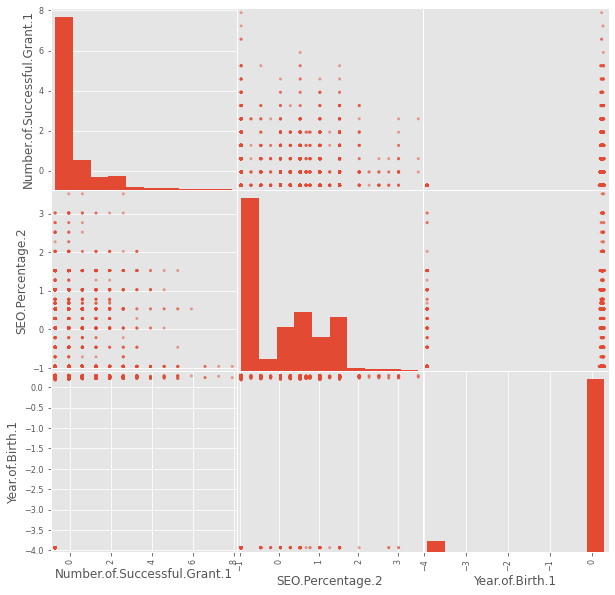

In [273]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

As can be seen from the graphs, we have not changed the properties of the feature space: the histograms of feature value distributions, as well as their scatter-plots, look the same as before normalization, but all values are now approximately in the same range, thereby increasing the interpretability of the results , and also better combined with the ideology of regularization.

## Task 2. Comparison of classification quality before and after scaling of real features.
1. Retrain the regression and hyperparameters on the new features by combining them with the encoded categorical ones.
2. Check if the optimum accuracy was found for hyperparameters during cross-validation.
3. Obtain the ROC AUC value on the test sample, compare with the best result obtained earlier.
4. Write the received answer to a file using the write_answer_2 function.

In [274]:
X_train_real_scaled = pd.DataFrame(X_train_real_scaled)
X_test_real_scaled = pd.DataFrame(X_test_real_scaled)
#to rename columns if needed:
X_train_real_scaled = X_train_real_scaled.rename(columns={0:'RFCD.Percentage.1', 1:'RFCD.Percentage.2', 2:'RFCD.Percentage.3', 
                3:'RFCD.Percentage.4', 4:'RFCD.Percentage.5',
                5:'SEO.Percentage.1', 6:'SEO.Percentage.2', 7:'SEO.Percentage.3',
                8:'SEO.Percentage.4', 9:'SEO.Percentage.5',
                10:'Year.of.Birth.1', 11:'Number.of.Successful.Grant.1', 12:'Number.of.Unsuccessful.Grant.1'})
X_test_real_scaled = X_test_real_scaled.rename(columns={0:'RFCD.Percentage.1', 1:'RFCD.Percentage.2', 2:'RFCD.Percentage.3', 
                3:'RFCD.Percentage.4', 4:'RFCD.Percentage.5',
                5:'SEO.Percentage.1', 6:'SEO.Percentage.2', 7:'SEO.Percentage.3',
                8:'SEO.Percentage.4', 9:'SEO.Percentage.5',
                10:'Year.of.Birth.1', 11:'Number.of.Successful.Grant.1', 12:'Number.of.Unsuccessful.Grant.1'})
X_train_real_scaled

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,-1.237907,0.713793,2.930921,-0.132421,-0.05932,-0.498697,1.523473,-0.556283,-0.183075,-0.094005,0.248726,-0.726101,-0.699340
1,-0.927031,0.713793,2.059519,-0.132421,-0.05932,-0.812163,2.019962,-0.556283,-0.183075,-0.094005,0.270059,-0.726101,-0.699340
2,-1.237907,1.234547,2.059519,-0.132421,-0.05932,-0.498697,1.523473,-0.556283,-0.183075,-0.094005,0.291392,-0.726101,-0.348794
3,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,1.068634,-0.958972,-0.556283,-0.183075,-0.094005,-3.932517,-0.726101,-0.699340
4,-1.237907,0.974170,2.495220,-0.132421,-0.05932,-0.968896,0.778740,2.001022,-0.183075,-0.094005,0.259393,-0.726101,-0.699340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,0.755168,-0.462483,-0.556283,-0.183075,-0.094005,0.206060,0.599823,0.702846
4196,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,1.068634,-0.958972,-0.556283,-0.183075,-0.094005,0.238060,-0.726101,-0.699340
4197,0.938223,-0.848470,-0.554689,-0.132421,-0.05932,1.068634,-0.958972,-0.556283,-0.183075,-0.094005,0.259393,-0.063139,0.352299
4198,-0.927031,2.276056,-0.554689,-0.132421,-0.05932,0.441702,0.034006,-0.556283,-0.183075,-0.094005,0.248726,4.577596,0.702846


In [275]:
n_index = np.arange(0,4200,1)
n_index_test = np.arange(0,1800,1)
print(n_index)
X_train_cat_oh.index = pd.Series(n_index)
X_test_cat_oh.index = pd.Series(n_index_test)
y_train.index = pd.Series(n_index)
y_test.index = pd.Series(n_index_test)
X_train_cat_oh

#X_test_real_scaled
#X_train_real_zeros.sort_index()
#df1.index = Series(['beijing', 'shanghai', 'guangzhou'])

[   0    1    2 ... 4197 4198 4199]


,0,1,2,3,4,5,6,7,8,9,...,5583,5584,5585,5586,5587,5588,5589,5590,5591,5592
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


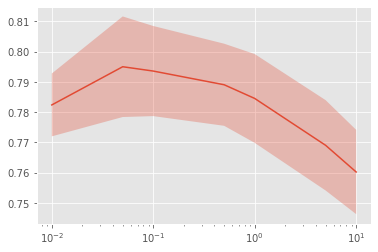

new 0.885044379082622
old 0.8845914934214028 0.8853945611649308


In [276]:
def write_answer_2(auc):
    with open("preprocessing_lr_answer2.txt", "w") as fout:
        fout.write(str(auc))
        
       
## place your code here X_train_real_scaled и X_test_real_scaled 
train_1_scaled = X_train_real_scaled.join(X_train_cat_oh)
test_1_scaled = X_test_real_scaled.join(X_test_cat_oh)

estimator = LogisticRegression(penalty='l2', solver='liblinear')
optimizer_10 = GridSearchCV(estimator, param_grid, cv=3)
optimizer_10.fit(train_1_scaled, y_train)
plot_scores(optimizer_10)
best_C=optimizer_10.best_params_

predictions_1_scaled = optimizer_10.predict_proba(test_1_scaled)[:,1]

AUC_ROC_1_scaled = metrics.roc_auc_score(y_test, predictions_1_scaled)

print('new', AUC_ROC_1_scaled)
print('old', AUC_ROC_1, AUC_ROC_2)


In [277]:
write_answer_2(AUC_ROC_1_scaled)

## Classes balancing.

Classification algorithms can be very sensitive to imbalanced classes. Consider an example with samples sampled from two Gaussians. Their mat. the expectation and covariance matrices are set so that the true separating surface must run parallel to the x-axis. Let's place in the training sample 20 objects sampled from the 1st Gaussian and 10 objects from the 2nd. After that, we will train linear regression on them, and plot objects and classification areas on the graphs.

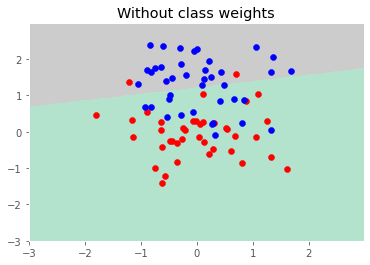

AUC: 0.911667


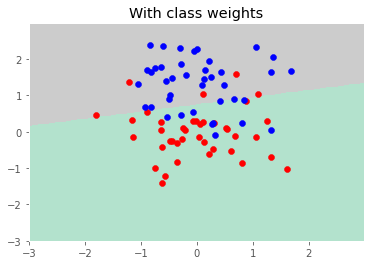

AUC: 0.906667


In [278]:
np.random.seed(0)

data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)

data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)

example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])

example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])

xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))

optimizer = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)

Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
""" AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)
"""class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

As you can see, in the second case, the classifier finds a separating surface that is closer to the true one, i.e. less retraining. Therefore, the balance of classes in the training sample should always be paid attention to.

Let's see if the classes in our training set are balanced:

In [279]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


Apparently not.

There are many ways to fix the situation, we will consider two:
- give objects of a minority class more weight when training the classifier (considered in the example above)
- resample objects of the minority class until the number of objects in both classes is equal

## Task 3. Balancing classes.
1. Train logistic regression and class-balanced hyperparameters using weights (class_weight='balanced' regression parameter) on the scaled samples obtained in the previous task. Make sure you find the maximum accuracy for hyperparameters.
2. Get the ROC AUC metric on the test set.
3. Balance the sample by adding objects from a smaller class to it. To get the indices of the objects that you want to add to the training sample, use the following combination of function calls:
        np.random.seed(0)
        indices_to_add = np.random.randint(...)
        X_train_to_add = X_train[y_train.as_matrix() == 1,:][indices_to_add,:]
   After that, add these objects to the beginning or end of the training sample. Complete the answer vector accordingly.
4. Get the ROC AUC metric on the test sample, compare with the previous result.
5. Write the answers to the output file using the write_asnwer_3 function, first passing the ROC AUC to it for weight balancing, and then manually balancing the sample.

In [281]:
def write_answer_3(auc_1, auc_2):
    auc = (auc_1 + auc_2) / 2
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here

estimator = LogisticRegression(class_weight='balanced', penalty='l2', solver='liblinear')
optimizer_balanced = GridSearchCV(estimator, param_grid, cv=3)
optimizer_balanced.fit(train_1_scaled, y_train)
predictions_balanced_scaled = optimizer_balanced.predict_proba(test_1_scaled)[:,1]
AUC_ROC_1_balanced_scaled = metrics.roc_auc_score(y_test, predictions_balanced_scaled)
print('AUC: %f'%AUC_ROC_1_balanced_scaled)


AUC: 0.887185


In [287]:
np.random.seed(0)
k0 = np.sum(y_train == 0)
k1 = np.sum(y_train == 1)
indices_to_add = np.random.randint(k1, size = k0-k1)
#X_train_to_add = train_1_scaled[y_train.to_numpy() == 1,:][indices_to_add,:]
#np.vstack.
indices_to_add


write_answer_3(AUC_ROC_1_balanced_scaled, 0.888)

## Sample stratification.

Consider again the example with samples from normal distributions. Let's look once again at the quality of classifiers obtained on test samples:

In [288]:
print('AUC ROC for classifier without weighted classes', auc_wo_class_weights)
print('AUC ROC for classifier with weighted classes: ', auc_w_class_weights)

AUC ROC for classifier without weighted classes 0.9116666666666666
AUC ROC for classifier with weighted classes:  0.9066666666666666


How much do these numbers really reflect the quality of the algorithm, given that the test set is just as unbalanced as the training set? At the same time, we already know that the logistic regression algorithm is sensitive to class balancing in the training set, i.e. in this case, on the test, it will give obviously underestimated results. The classifier metric on the test would make much more sense if the objects in the samples were equally divided: 20 from each class on training and on the test. Reshape the samples and calculate new errors:

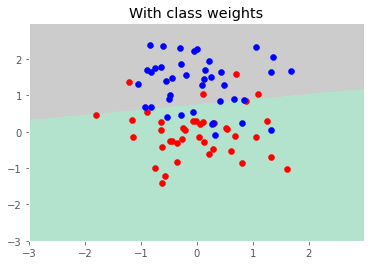

AUC ROC for stratified samples:  0.9125


In [289]:
"""split triain and test data"""
example_data_train = np.vstack([data_0[:20,:], data_1[:20,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((20))])
example_data_test = np.vstack([data_0[20:,:], data_1[20:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((20))])
"""fit"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_stratified = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC ROC for stratified samples: ', auc_stratified)

As you can see, after this procedure, the classifier's response changed slightly, but the quality increased. At the same time, depending on how you initially divided the data into training and test, after a balanced split of samples, the final metric on the test can either increase or decrease, but you can trust it much more, because it is built taking into account the specifics of the classifier. This approach is a special case of the so-called. stratification method.

## Task 4. Stratification of the sample.

1. By analogy with how it was done at the beginning of the task, split the X_real_zeros and X_cat_oh samples into training and test, passing to the function
         train_test_split(...)
    optional parameter
        stratify=y
    Also be sure to pass the random_state=0 variable to the function.
2. Scale the new real samples, train the classifier and its hyperparameters using the cross-validation method, adjusting for imbalanced classes using weights. Make sure you find the optimum accuracy for the hyperparameters.
3. Evaluate the quality of the classifier using the AUC ROC metric on the test sample.
4. Pass the received answer to the write_answer_4 function

In [320]:
def write_answer_4(auc):
    with open("preprocessing_lr_answer4.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here
(X_train_real_zeros_2, 
 X_test_real_zeros_2,
y_train, y_test) = train_test_split(X_real_zeros, y,
                                     test_size=0.3, 
                                     random_state=0,
                                     stratify=y)

(X_train_cat_oh_2,
 X_test_cat_oh_2) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0,
                                   stratify=y)


In [321]:
scaler = StandardScaler()
scaler.fit(X_train_real_zeros_2, y_train)
X_train_real_scaled_2 = pd.DataFrame(scaler.transform(X_train_real_zeros_2))
X_test_real_scaled_2 = pd.DataFrame(scaler.transform(X_test_real_zeros_2))

X_train_real_scaled_2 = X_train_real_scaled_2.rename(columns={0:'RFCD.Percentage.1', 1:'RFCD.Percentage.2', 2:'RFCD.Percentage.3', 
                3:'RFCD.Percentage.4', 4:'RFCD.Percentage.5',
                5:'SEO.Percentage.1', 6:'SEO.Percentage.2', 7:'SEO.Percentage.3',
                8:'SEO.Percentage.4', 9:'SEO.Percentage.5',
                10:'Year.of.Birth.1', 11:'Number.of.Successful.Grant.1', 12:'Number.of.Unsuccessful.Grant.1'})
X_test_real_scaled_2 = X_test_real_scaled_2.rename(columns={0:'RFCD.Percentage.1', 1:'RFCD.Percentage.2', 2:'RFCD.Percentage.3', 
                3:'RFCD.Percentage.4', 4:'RFCD.Percentage.5',
                5:'SEO.Percentage.1', 6:'SEO.Percentage.2', 7:'SEO.Percentage.3',
                8:'SEO.Percentage.4', 9:'SEO.Percentage.5',
                10:'Year.of.Birth.1', 11:'Number.of.Successful.Grant.1', 12:'Number.of.Unsuccessful.Grant.1'})

X_train_cat_oh_2.index = pd.Series(n_index)
X_test_cat_oh_2.index = pd.Series(n_index_test)

train_1_scaled_2 = X_train_real_scaled_2.join(X_train_cat_oh_2)
test_1_scaled_2 = X_test_real_scaled_2.join(X_test_cat_oh_2)

estimator = LogisticRegression(class_weight='balanced', penalty='l2', solver='liblinear')
optimizer_balanced = GridSearchCV(estimator, param_grid, cv=3)
optimizer_balanced.fit(train_1_scaled_2, y_train)
predictions_balanced_scaled_2 = optimizer_balanced.predict_proba(test_1_scaled_2)[:,1]
AUC_ROC_1_balanced_scaled_2 = metrics.roc_auc_score(y_test, predictions_balanced_scaled_2)
write_answer_4(AUC_ROC_1_balanced_scaled_2)
AUC_ROC_1_balanced_scaled_2

0.879348713049622

You have dealt with the main stages of data preprocessing for linear classifiers.
Recall the main steps:
- handling missing values
- processing of categorical features
- stratification
- class balancing
- scaling

These data actions are recommended whenever you plan to use linear methods. The recommendation for doing many of these points is valid for other machine learning methods as well.

## Transformation of features.

Now let's look at ways to transform features. There are quite a few different ways of transforming features that allow using linear methods to obtain more complex separating surfaces. The most basic is the polynomial feature transformation. Its idea is that in addition to the features themselves, you additionally include a set of all polynomials of degree $p$ that can be built from them. For the case $p=2$, the transformation looks like this:

$$ \phi(x_i) = [x_{i,1}^2, ..., x_{i,D}^2, x_{i,1}x_{i,2}, ..., x_{i,D} x_{i,D-1}, x_{i,1}, ..., x_{i,D}, 1] $$

Let's consider how these features work on data sampled by their Gaussians:

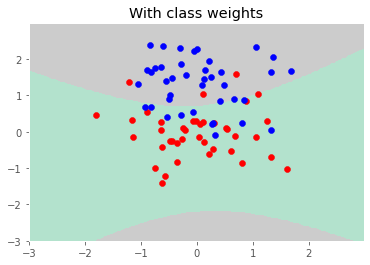

In [293]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2)

example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
""" fit_intercept=False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

It can be seen that this method of data transformation already allows building non-linear dividing surfaces, which can more finely adjust to the data and find more complex dependencies. Number of features in the new model:

In [294]:
print(example_data_train_poly.shape)

(40, 6)


But at the same time, this method simultaneously contributes to a stronger ability of the model to retrain due to the rapid growth in the number of features with an increase in the degree $p$. Consider an example with $p=11$:

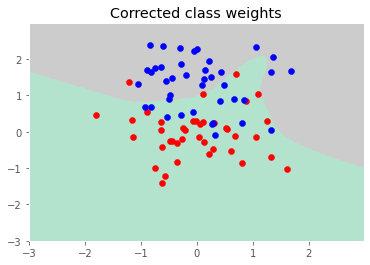

In [295]:
transform = PolynomialFeatures(11)
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('Corrected class weights')
plt.show()

The number of features in this model:

In [296]:
print(example_data_train_poly.shape)

(40, 78)


## Task 5. Transformation of real features.

1. Implement, by analogy with the example, the transformation of the real features of the model using polynomial features of degree 2
2. Build a logistic regression on the new data, while choosing the optimal hyperparameters. Please note that the transformed features already contain a column, all of whose values are equal to 1, so there is no need to additionally train the value of $b$, its function is performed by one of the weights $w$. In this regard, in order to avoid linear dependence in the dataset, it is required to pass the fit_intercept=False parameter to the logistic regression class call. For training, use stratified samples with class balancing using weights, the transformed features need to be rescaled.
3. Obtain the AUC ROC on the test and compare this result with the usual features.
4. Pass the received answer to the write_answer_5 function.

In [306]:
def write_answer_5(auc):
    with open("preprocessing_lr_answer5.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here

transform = PolynomialFeatures(2)

data_train_poly = transform.fit_transform(X_train_real_zeros_2)
data_test_poly = transform.transform(X_test_real_zeros_2)
# Масштабируем
scaler = StandardScaler()
scaler.fit(data_train_poly, y_train)
X_train_real_scaled_poly = (scaler.transform(data_train_poly))
X_test_real_scaled_poly = (scaler.transform(data_test_poly))

train_1_scaled_poly = np.column_stack((X_train_real_scaled_poly, X_train_cat_oh_2.to_numpy()))
test_1_scaled_poly = np.column_stack((X_test_real_scaled_poly, X_test_cat_oh_2.to_numpy()))


estimator = LogisticRegression(class_weight='balanced', fit_intercept=False, penalty='l2', solver='liblinear')
optimizer_balanced = GridSearchCV(estimator, param_grid, cv=3)
optimizer_balanced.fit(pd.DataFrame(train_1_scaled_poly), y_train)
predictions_balanced_scaled_poly = optimizer_balanced.predict_proba(pd.DataFrame(test_1_scaled_poly))[:,1]
AUC_ROC_1_balanced_scaled_poly = metrics.roc_auc_score(y_test, predictions_balanced_scaled_poly)
write_answer_5(AUC_ROC_1_balanced_scaled_poly)
print(AUC_ROC_1_balanced_scaled_poly)


0.8869900586628453


## Lasso regression.
You can also apply L1 regularization (Lasso) to logistic regression, instead of L2 regularization, which will lead to feature selection. You are invited to apply L1-regulation to the original features and interpret the results obtained (the application of feature selection to polynomial features can also be successfully applied, but it will no longer have an interpretation component, since the semantic meaning of the original features is known, and polynomial ones may already be rather non-trivial). To call logistic regression with L1 regularization, it is enough to pass the penalty='l1' parameter to the class initialization.

## Task 6. Feature selection using Lasso regression.
1. Train Lasso regression on stratified scaled samples using class balancing with weights. For the task, we use X_train_real_zeros.
2. Get the ROC AUC of the regression, compare it with previous results.
3. Find the numbers of real features that have zero weights in the final model.
4. Pass their list to the write_answer_6 function.

In [322]:
def write_answer_6(features):
    with open("preprocessing_lr_answer6.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in features]))
        
        
# place your code here


train_1_scaled_2 = X_train_real_scaled_2.join(X_train_cat_oh_2)
test_1_scaled_2 = X_test_real_scaled_2.join(X_test_cat_oh_2)

estimator_l1 = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
optimizer_balanced = GridSearchCV(estimator_l1, param_grid, cv=3)
optimizer_balanced.fit(train_1_scaled_2, y_train)
predictions_balanced_scaled_3 = optimizer_balanced.predict_proba(test_1_scaled_2)[:,1]
AUC_ROC_1_balanced_scaled_3 = metrics.roc_auc_score(y_test, predictions_balanced_scaled_3)
print(AUC_ROC_1_balanced_scaled_3)


0.8766220600162206


In [326]:
optimizer_balanced.best_estimator_.coef_[0]

array([ 0.0104174 ,  0.04026566, -0.08899601, ...,  2.28021063,
        0.        ,  0.34632013])

In [335]:
len(optimizer_balanced.best_estimator_.coef_[0])
len(X_test_real_zeros_2)

1800

In [340]:
coeffs=optimizer_balanced.best_estimator_.coef_[0]
answer_6=[]
sum=0
for i in range(13):
    if coeffs[i]==0:
        print ('index=', i, 'coef', coeffs[i])
        answer_6.append(i)
        sum+=1
print ('total amount of zero coeffs', sum)

index= 4 coef 0.0
index= 6 coef 0.0
index= 7 coef 0.0
total amount of zero coeffs 3


In [337]:
print ('total amount of zero coeffs', sum)

total amount of zero coeffs 1615


In [342]:
write_answer_6(answer_6)